In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data/hotel_bookings.csv")

In [3]:
data.arrival_date_month.unique()
pd.crosstab(data.is_canceled, data.arrival_date_month)

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
is_canceled,,,,,,,,,,,,
0,6565,8638,4409,5372,4122,7919,6404,6645,7114,4672,6914,6392
1,4524,5239,2371,2696,1807,4742,4535,3149,4677,2122,4246,4116


In [4]:
# 'BRA' in data.country.unique()
# data.groupby("country").count().sort_values(by="hotel", ascending=False).iloc[0:5][["is_canceled"]].plot()
# data.groupby("arrival_date_month").count()["hotel"].plot()
data.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [5]:
# data.describe().T.drop(columns=["count"])

In [6]:
# data.sample(8).T

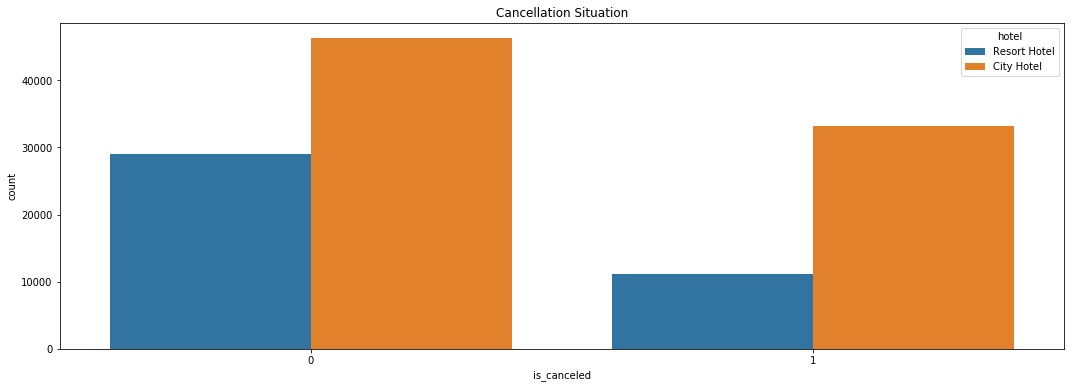

In [7]:
plt.figure(figsize=(18,6))
sns.countplot(x='is_canceled', hue = 'hotel', data= data)
plt.title('Cancellation Situation')
plt.show()

In [8]:
data.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [9]:
# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

mode_binary = Pipeline([
    ('encoder', SimpleImputer(strategy = 'most_frequent')),
    ('binary', BinaryEncoder())])

transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(handle_unknown = 'ignore'), [ 'hotel', 'meal', 'market_segment', 'reservation_status','reserved_room_type', 'assigned_room_type','arrival_date_month', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']),
    ('mode binary', mode_binary, ['country']),
    ('impute mode', SimpleImputer(strategy = 'most_frequent'), ['children'])], remainder = 'passthrough')


In [10]:
data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [11]:
X = data.drop(columns=['is_canceled','reservation_status_date'], axis = 1)
y = data['is_canceled']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 1515)

In [13]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 1515)
knn = KNeighborsClassifier()

In [14]:
logreg_pipe = Pipeline([('transformer', transformer), ('logreg', logreg)])
tree_pipe = Pipeline([('transformer', transformer), ('tree', tree)])
knn_pipe = Pipeline([('transformer', transformer), ('scale', MinMaxScaler()), ('knn', knn)])

In [15]:
def model_evaluation(model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

In [16]:
logreg_pipe_cv = model_evaluation(logreg_pipe, 'precision')
tree_pipe_cv = model_evaluation(tree_pipe, 'precision')
knn_pipe_cv = model_evaluation(knn_pipe, 'precision')

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

In [17]:
# for model in [logreg_pipe, tree_pipe, knn_pipe]:
#     model.fit(X_train, y_train)

In [18]:
!pip3 install neuralprophet

distutils: /usr/local/lib/python3.6/dist-packages
sysconfig: /usr/lib/python3.6/site-packages
distutils: /usr/local/lib/python3.6/dist-packages
sysconfig: /usr/lib/python3.6/site-packages
distutils: /usr/local/include/python3.6/UNKNOWN
sysconfig: /usr/include/python3.6m
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
ERROR: Could not find a version that satisfies the requirement neuralprophet (from versions: none)
ERROR: No matching distribution found for neuralprophet


In [19]:
!python3 --version

Python 3.6.9
